In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load the data into a DataFrame
df = pd.read_csv('F:/Docs/Data Science/Projects/final_dataset.csv')

# Handle missing values
df.fillna(0, inplace=True)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Extract the year from the 'Date' column and create a 'Season' column
df['Season'] = df['Date'].dt.year
# Encode categorical variables (if needed)
df['FTR'] = df['FTR'].map({'H': 1, 'NH': 0})

df.head()

C:\Users\soumi\AppData\Local\Temp\ipykernel_11752\3108328713.py:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,Season,GoalDifference,PointsDifference
0,0,2000-08-19,Charlton,Man City,4,0,1,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,2000,4,0.0
1,1,2000-08-19,Chelsea,West Ham,4,2,1,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,2000,2,0.0
2,2,2000-08-19,Coventry,Middlesbrough,1,3,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,2000,-2,0.0
3,3,2000-08-19,Derby,Southampton,2,2,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,2000,0,0.0
4,4,2000-08-19,Leeds,Everton,2,0,1,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,2000,2,0.0


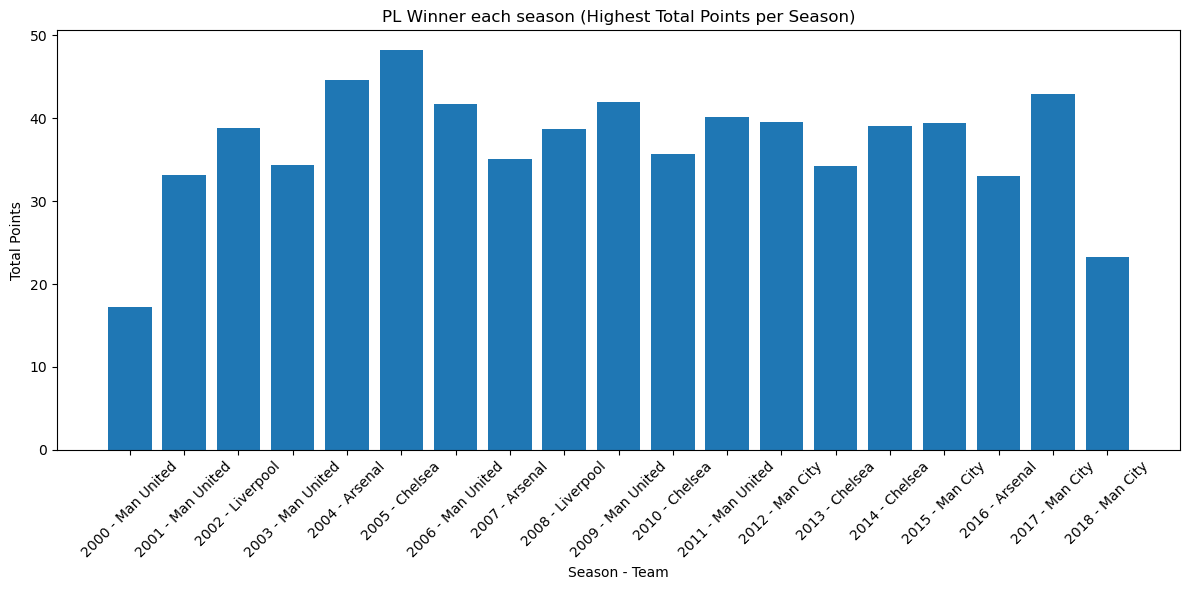

In [17]:
# Group the data by season and team and find the team with the highest total points in each season
season_team_rankings = df.groupby(['Season', 'HomeTeam'])['HTP'].sum().reset_index()
season_team_rankings = season_team_rankings.sort_values(by=['Season', 'HTP'], ascending=[True, False])
highest_points_teams = season_team_rankings.groupby('Season').first().reset_index()

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create a bar chart with a specified height (bar width)
plt.bar(highest_points_teams['Season'].astype(str) + ' - ' + highest_points_teams['HomeTeam'], highest_points_teams['HTP'])
plt.xlabel('Season - Team')
plt.ylabel('Total Points')
plt.title('PL Winner each season (Highest Total Points per Season)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

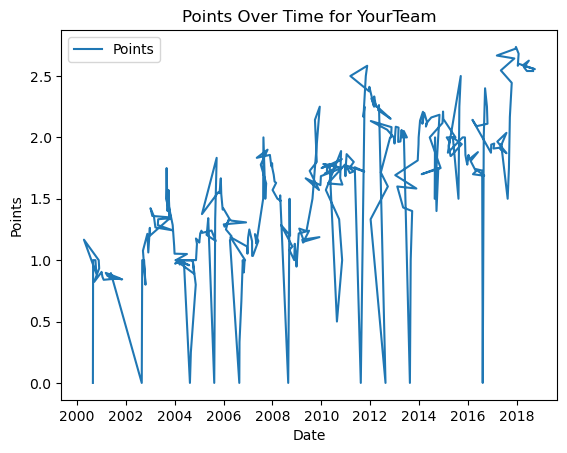

In [18]:
team_data = df[df['HomeTeam'] == 'Man City']  # Replace 'YourTeam' with the desired team name
plt.plot(team_data['Date'], team_data['HTP'], label='Points')
plt.xlabel('Date')
plt.ylabel('Points')
plt.title('Points Over Time for YourTeam')
plt.legend()
plt.show()

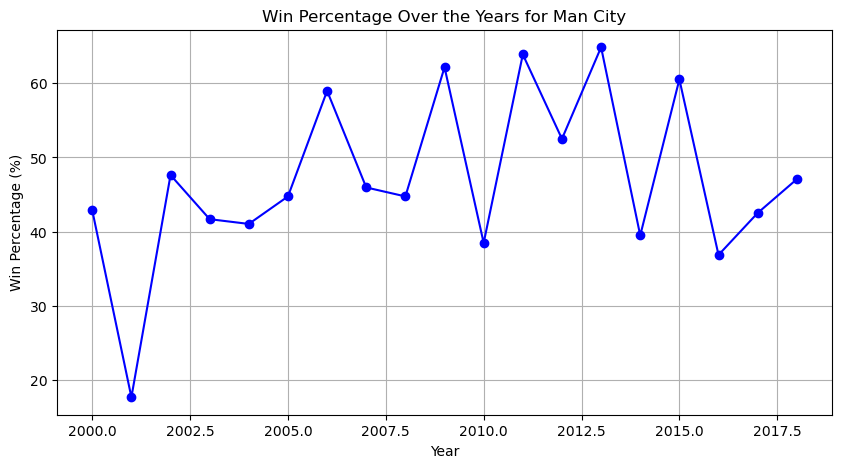

In [39]:
# Specify the team for which you want to calculate win percentage
team_name = 'Man City'

# Group data by season
season_groups = df.groupby('Season')

# Initialize empty lists to store win percentages and years
win_percentages = []
years = []

# Calculate win percentage for 'Man City' over the years
for season, season_data in season_groups:
    matches_played = season_data[
        (season_data['HomeTeam'] == team_name) | (season_data['AwayTeam'] == team_name)
    ]
    
    # Calculate the number of total matches and won matches for this season
    total_matches = len(matches_played)
    won_matches = len(matches_played[matches_played['FTR'] == 1])
    
    # Calculate win percentage as (total wins / total matches) * 100
    if total_matches > 0:
        win_percentage = (won_matches / total_matches) * 100
    else:
        win_percentage = 0  # No matches played by the team in this season
    
    win_percentages.append(win_percentage)
    years.append(season)

# Plot the win percentage over the years
plt.figure(figsize=(10, 5))
plt.plot(years, win_percentages, marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Win Percentage (%)')
plt.title(f'Win Percentage Over the Years for {team_name}')
plt.grid(True)
plt.show()

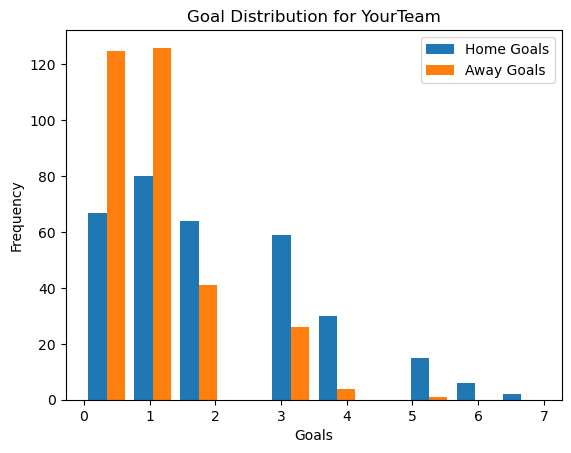

In [40]:
# Plot a histogram of goals scored by a specific team
team_data = df[df['HomeTeam'] == 'Man City']  # Replace 'YourTeam' with the desired team name
plt.hist([team_data['FTHG'], team_data['FTAG']], bins=10, label=['Home Goals', 'Away Goals'])
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.title('Goal Distribution for YourTeam')
plt.legend()
plt.show()

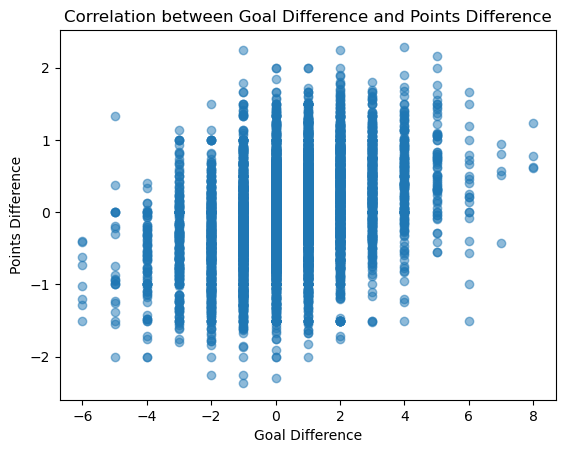

In [41]:
# Create a scatter plot to visualize the correlation between goal difference and points difference
plt.scatter(df['GoalDifference'], df['PointsDifference'], alpha=0.5)
plt.xlabel('Goal Difference')
plt.ylabel('Points Difference')
plt.title('Correlation between Goal Difference and Points Difference')
plt.show()

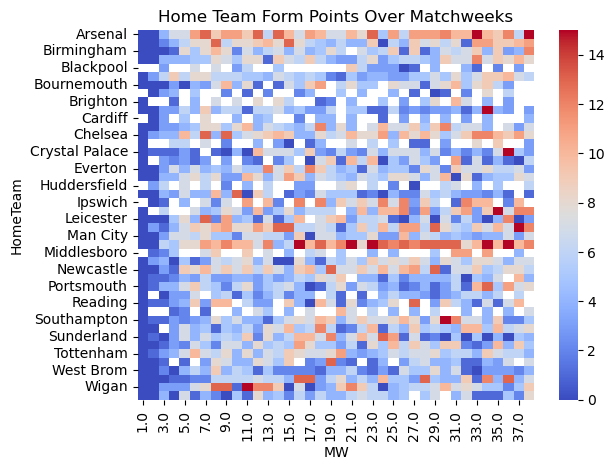

In [42]:
# Create a heatmap for form points of the home team
form_matrix = df.pivot_table(index='HomeTeam', columns='MW', values='HTFormPts', aggfunc='first')
sns.heatmap(form_matrix, cmap='coolwarm')
plt.title('Home Team Form Points Over Matchweeks')
plt.show()